In [19]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa 
#import librosa.display
from IPython.display import Audio
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
plt.style.use('ggplot')

In [2]:
paths=[]
labels=[]

for dirname, _, filenames in os.walk('Emotions/input/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename[::-1].split('.')[0][::-1]
        name = dirname[::].split('/')[2]
        name_complete = name+'.'+label
        labels.append(name_complete.lower())



In [3]:
data = pd.DataFrame({'speech':paths,'label':labels})
data.sample(10)

,speech,label
11077,Emotions/input/Sad\1048_IWL_SAD_XX.wav,sad.wav
7283,Emotions/input/Happy\1060_IWL_HAP_XX.wav,happy.wav
7450,Emotions/input/Happy\1072_ITS_HAP_XX.wav,happy.wav
8228,Emotions/input/Happy\YAF_wag_happy.wav,happy.wav
3597,Emotions/input/Disgusted\1089_MTI_DIS_XX.wav,disgusted.wav
3059,Emotions/input/Disgusted\1051_IEO_DIS_MD.wav,disgusted.wav
10627,Emotions/input/Sad\1016_IOM_SAD_XX.wav,sad.wav
9070,Emotions/input/Neutral\1054_IWW_NEU_XX.wav,neutral.wav
2555,Emotions/input/Disgusted\1015_IEO_DIS_LO.wav,disgusted.wav
3700,Emotions/input/Disgusted\OAF_jug_disgust.wav,disgusted.wav


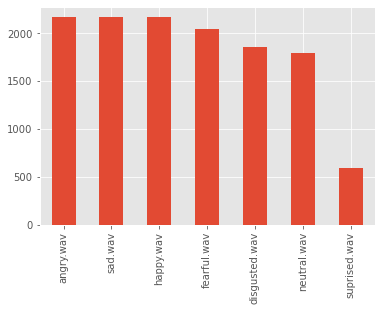

In [4]:
data['label'].value_counts().plot(kind='bar');

In [5]:
import librosa.display

def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    
def ana_emotion(emotion:str, df:pd.DataFrame):
    path=np.array(df['speech'][df['label']==emotion])[0]
    data,sampling_rate=librosa.load(path)
    waveplot(data,sampling_rate,emotion)
    spectogram(data,sampling_rate,emotion)
    Audio(path)

In [6]:
data = data[data.label.apply(lambda x: x != '.ds_store')]

In [7]:
data['label'].unique().tolist()

['angry.wav',
 'disgusted.wav',
 'fearful.wav',
 'happy.wav',
 'neutral.wav',
 'sad.wav',
 'suprised.wav']

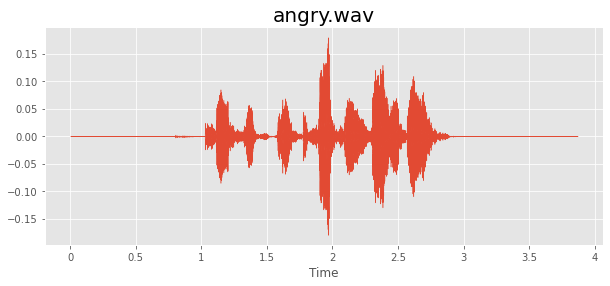

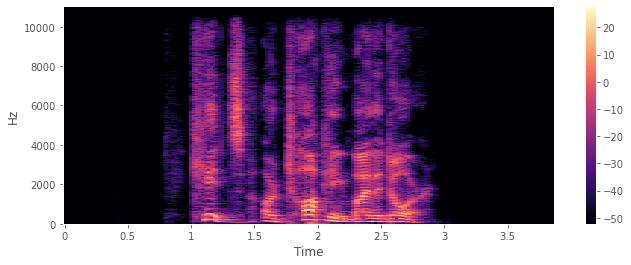

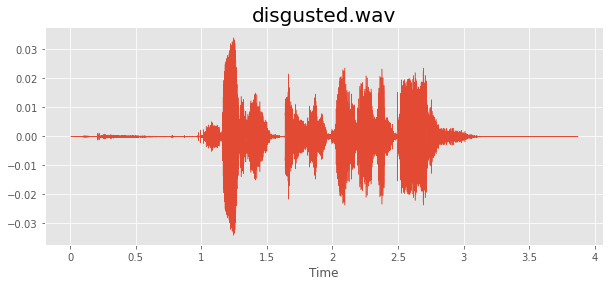

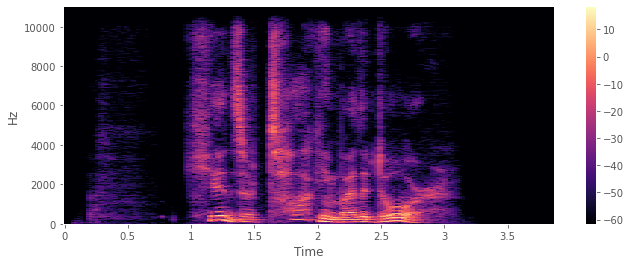

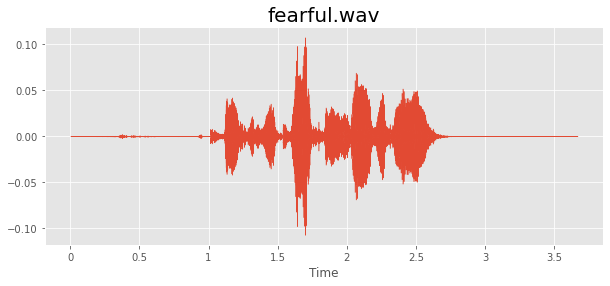

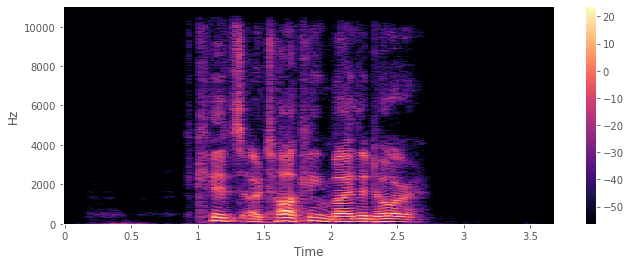

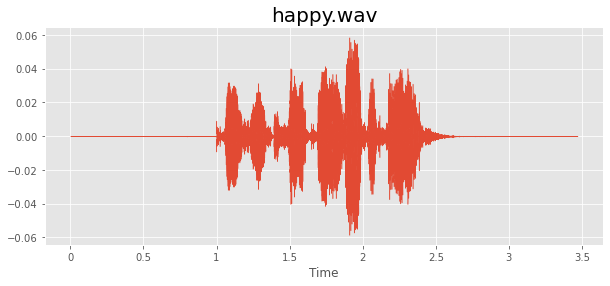

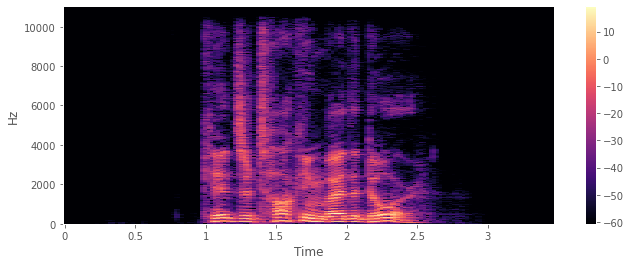

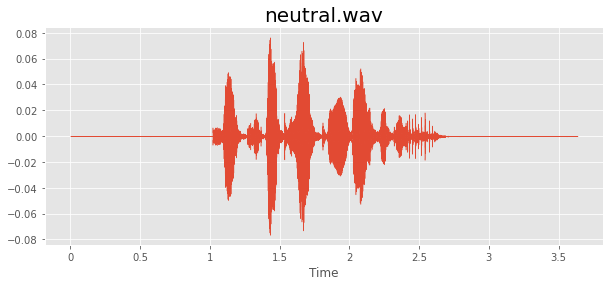

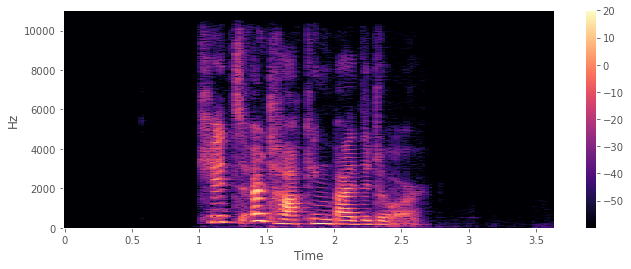

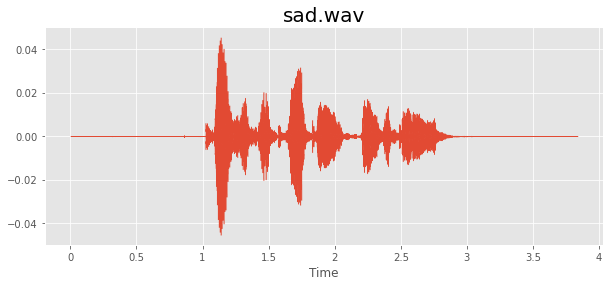

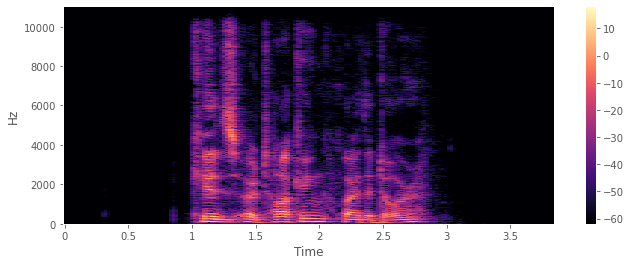

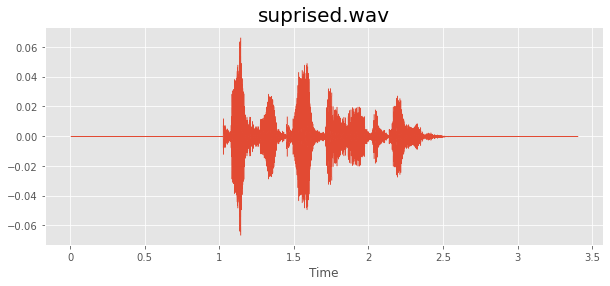

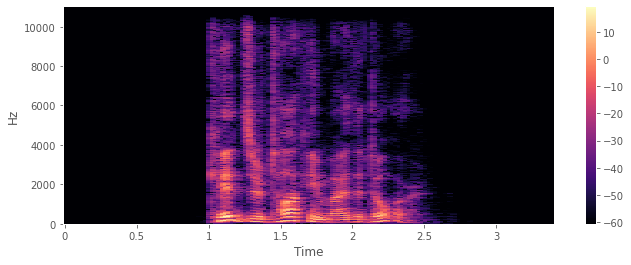

In [8]:
for i in data['label'].unique().tolist(): # ver uno de cada sentimiento
    ana_emotion(i,data)

In [9]:
def MFCC(filename):
    y, sr = librosa.load(filename,duration=3,offset=0.5)
    return np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)

mfcc= data['speech'].apply(lambda x:MFCC(x))

In [10]:
mfcc

0        [-492.3691, 56.3634, -9.584242, 18.014067, -3....
1        [-527.9743, 54.69438, -14.746857, 8.957756, -9...
2        [-557.1632, 79.16915, -1.0876601, 23.747974, 1...
3        [-523.06934, 43.876232, -14.765749, 5.9150915,...
4        [-473.48077, 75.53822, -19.603502, 10.48258, 4...
                               ...                        
12793    [-376.5839, 63.959797, -3.0598657, 11.498796, ...
12794    [-355.02838, 87.61324, -22.081991, 2.3526459, ...
12795    [-345.9045, 62.633904, 2.1816177, 3.6597912, -...
12796    [-334.6705, 80.249825, -32.716793, 3.8717275, ...
12797    [-376.12756, 63.290413, -6.507844, 16.757235, ...
Name: speech, Length: 12798, dtype: object

Loading YAMNet from TensorFlow Hub

In [1]:
import tensorflow
print(tensorflow.__version__)

2.6.0


In [3]:
!pip3 install tensorflow==2.7.0

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\ksmunoz\\AppData\\Roaming\\Python\\Python38\\site-packages\\~ensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.



  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [4]:
!pip3 install tensorflow-io==0.23.1

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.



  Using cached tensorflow_io-0.23.1-cp38-cp38-win_amd64.whl (21.6 MB)
  Using cached tensorflow_io_gcs_filesystem-0.23.1-cp38-cp38-win_amd64.whl (1.5 MB)
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.24.0
    Uninstalling tensorflow-io-gcs-filesystem-0.24.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.24.0


In [15]:
! pip install "tensorflow==2.10.*"
# tensorflow_io 0.27 is compatible with TensorFlow 2.10
! pip install "tensorflow_io==0.27.*"

  Using cached numpy-1.23.5-cp38-cp38-win_amd64.whl (14.7 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\google\\~-otobuf\\internal\\_api_implementation.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.23.1
    Uninstalling tensorflow-io-gcs-filesystem-0.23.1:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.23.1
  Attempting uninstall: tensorflow-io
    Found existing installation: tensorflow-io 0.23.1
    Uninstalling tensorflow-io-0.23.1:


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\tensorflow_io\\python\\ops\\libtensorflow_io_plugins.so'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [16]:
import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio

In [17]:
yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

In [18]:
testing_wav_file_name = tf.keras.utils.get_file('miaow_16k.wav',
                                                'https://storage.googleapis.com/audioset/miaow_16k.wav',
                                                cache_dir='./',
                                                cache_subdir='test_data')

print(testing_wav_file_name)

./test_data\miaow_16k.wav


In [19]:
# Utility functions for loading audio files and making sure the sample rate is correct.

@tf.function
def load_wav_16k_mono(filename):
      
      """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
      file_contents = tf.io.read_file(filename)
      wav, sample_rate = tf.audio.decode_wav(file_contents,desired_channels=1)
      wav = tf.squeeze(wav, axis=-1)
      sample_rate = tf.cast(sample_rate, dtype=tf.int64)
      wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
      return wav

In [21]:
testing_wav_data = load_wav_16k_mono(testing_wav_file_name)

_ = plt.plot(testing_wav_data)

# Play the audio file.
display.Audio(testing_wav_data,rate=16000)

NotImplementedError: in user code:

    <ipython-input-8-cece4eed1f01>:11 load_wav_16k_mono  *
        wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    c:\ProgramData\Anaconda3\lib\site-packages\tensorflow_io\python\ops\audio_ops.py:409 resample  **
        
    C:\Users\ksmunoz\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\parallel_for\control_flow_ops.py:546 vectorized_map
        
    C:\Users\ksmunoz\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\parallel_for\control_flow_ops.py:206 pfor
        
    C:\Users\ksmunoz\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\parallel_for\control_flow_ops.py:188 f
        
    C:\Users\ksmunoz\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\parallel_for\control_flow_ops.py:286 _pfor_impl
        
    C:\Users\ksmunoz\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\parallel_for\control_flow_ops.py:527 loop_fn
        
    c:\ProgramData\Anaconda3\lib\site-packages\tensorflow_io\python\ops\audio_ops.py:405 f
        
    c:\ProgramData\Anaconda3\lib\site-packages\tensorflow_io\python\ops\__init__.py:88 __getattr__
        return getattr(self._load(), attrb)
    c:\ProgramData\Anaconda3\lib\site-packages\tensorflow_io\python\ops\__init__.py:84 _load
        self._mod = _load_library(self._library)
    c:\ProgramData\Anaconda3\lib\site-packages\tensorflow_io\python\ops\__init__.py:69 _load_library
        raise NotImplementedError(

    NotImplementedError: unable to open file: libtensorflow_io.so, from paths: ['c:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow_io\\python\\ops\\libtensorflow_io.so']
    caused by: ['c:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow_io\\python\\ops\\libtensorflow_io.so not found']


In [11]:
import pandas as pd
class_map_path = yamnet_model.class_map_path().numpy().decode('utf-8')
class_names =list(pd.read_csv(class_map_path)['display_name'])

for name in class_names[:20]:
  print(name)
print('...')

Speech
Child speech, kid speaking
Conversation
Narration, monologue
Babbling
Speech synthesizer
Shout
Bellow
Whoop
Yell
Children shouting
Screaming
Whispering
Laughter
Baby laughter
Giggle
Snicker
Belly laugh
Chuckle, chortle
Crying, sobbing
...


In [12]:
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
class_scores = tf.reduce_mean(scores, axis=0)
top_class = tf.argmax(class_scores)
inferred_class = class_names[top_class]

print(f'The main sound is: {inferred_class}')
print(f'The embeddings shape: {embeddings.shape}')

NameError: name 'testing_wav_data' is not defined